In [ ]:
import pandas as pd
import numpy as np
import random
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
#creating a class for RBF network 
class RBF(object):
    #Referencing https://pythonmachinelearning.pro/using-neural-networks-for-regression-radial-basis-function-networks/
    #We start out by creating a class that has encompasses an RBF with k rbf units, sigma values, randomized weights, and centroids v
    def __init__(self, k, sigma):
        self.k = k  #k is the number of neurons in the hidden layer
        self.sigma = sigma
        #We initialize the weights at random between -1 and 1 for every unit in the hidden layer
        w = []
        for i in range(k):
          w.append(random.uniform(-1, 1))
        self.weights = w 
        #The centroids v(i) are defined to be empty at first because we want to change this assignment depending on the method used
        self.v = None
        
    #function that is used to calculate the G variable used for actvation within the hidden layer

    def Calculating_activation(self,x):
        p = x.shape[0] #This gives you the size of the testing or training set

        #G is the PHI matrix for the RBF functions for every input and value in hidden layer initialized to seros to set the size
        G = np.zeros((p,self.k)) 
        #We then loop for each input and take the radial activations for each neuron and add it to the PHI matrix
        for i in range(0,p):
            for j in range(0,self.k): 
                G[i,j] = np.exp((-1/(2*self.sigma**2))*np.linalg.norm(x[i]-self.v[j])**2)
                #linalg norm 2 is the euclidean distance beteween x and the centers vi
        return G

    #creating function that will calculate the mean square error
    def MSE_calculation_accuracy(self,x,y):
        overall = 0
        n = len(y)

        G = self.Calculating_activation(x)  
        pred = np.dot(G,self.weights) #Y = G*W which is the predicted values
        pred = np.sign(pred) #The sign function encodes the predicted output to -1, 0, and 1
        
        for i in range(n):
          if (y[i] == 1 and pred[i] >=0 ) or (y[i] == -1 and pred[i] <0):
            overall = overall +1

        return (overall/n)

    #funciton to update weights when the centers are set to the input
    def updating_weights(self, x, y):
      self.v = x #fix centroids to be the inputs
      G = self.Calculating_activation(x) #get Phi matrix
      self.weights = np.dot(np.linalg.pinv(G),y) #W= G+ * Y where pinv is the pseudo inverse matrix of G, which is multiplied by y to obtain W following 
      return

    #funciton to update weights when the centers are set to randomly chosen
    def updating_weights_random_input(self,x,y):
      p = x.shape[0] #get the size of the input array
      self.v = x[np.random.choice(p,self.k)] #set the centers to be equal to an input at a random number between 0 and the number of inputs
      G = self.Calculating_activation(x) #get the Phi matrix
      self.weights = np.dot(np.linalg.pinv(G),y) #W= G+ * Y where pinv is the pseudo inverse matrix of G, which is multiplied by y to obtain W following 
      return
    
    ##funciton to update weights when the centers are set to the kmeans ouput
    def updating_weights_kmeans(self,x,y):
      value_kmeans = KMeans(n_clusters= self.k, random_state= 0).fit(x) #Here the learning is unsupervised so we just need to fit the data to the already provided model
      #The cluster_centers_ is an object from the KMeans library that contains the centroids returned by the model
      self.v = value_kmeans.cluster_centers_ #fix centroids to be the ones returned by KMeans
      G = self.Calculating_activation(x) #get the Phi matrix
      self.weights = np.dot(np.linalg.pinv(G),y) #W= G+ * Y where pinv is the pseudo inverse matrix of G, which is multiplied by y to obtain W following 
      return

    def __del__(self):
        self.weights = None
        self.v = None




In [ ]:
#creating the dataset to then perform K means on
N_inputs = 441

#creating matrix to hold the x inputs
x = []

#creating all 441 randomly sampled data points defined as x = (xi,xj)

#NOTE: could change the method to which we create the input and output matrixes
for i in range(0, 21):
    for j in range(0,21):
        x.append([-2 + 0.2*i, -2+0.2*j])

#creating the respective label that should go with a given input
for i in range(0,N_inputs):
    output = (x[i][0]**2 + x[i][1]**2)
    if (output <= 1):
        x[i].append(1)
    else:
        x[i].append(-1)

#defind the establish training set as a numpy array
x = np.array(x)

In [ ]:
#splitting the data 80:20
np.random.seed(1)
np.random.shuffle(x)

train,test = x[int(N_inputs*0.2):],x[:int(N_inputs*0.2)]

#seperate the labels and the points
train_x = train[:,:-1]
test_x = test[:,:-1]

train_y  = train[:,-1:]
test_y = test[:,-1:]

sigmas = [0.05,0.1,0.2, 0.4, 0.8, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0 , 64.0 , 128.0, 256.0]

#part 1
train_accuracy_list_full = []
accuracy_list_full = []

#part 2 a
train_accuracy_list_random = []
accuracy_list_random = []

#part 2 b
train_accuracy_list_kmeans = []
accuracy_list_kmeans = []


#NOTE FOR BELOW: CAN WE CONDNESE ALL THREE FUNCTIONS INTO ONE AND SPIT OUT 3 DIFFERNET PLOTS?


In [ ]:
def Part1():
  #performing RBF with all training datapoints as the centers
  for i in sigmas:
    rbf_full_data = RBF(k = 353, sigma = i)

    rbf_full_data.updating_weights(train_x,train_y)
    acc_1 = rbf_full_data.MSE_calculation_accuracy(train_x,train_y)
    acc_2 = rbf_full_data.MSE_calculation_accuracy(test_x,test_y)

    train_accuracy_list_full.append(acc_1) 
    accuracy_list_full.append(acc_2) 
    del rbf_full_data

Part1()


In [ ]:
def Part2_random():
  #performing RBF with all training datapoints as the centers
  for i in sigmas:
    rbf_full_data = RBF(k = 150, sigma = i) #create object for RBF in order to create center, 

    rbf_full_data.updating_weights_random_input(train_x,train_y )
    acc_1 = rbf_full_data.MSE_calculation_accuracy(train_x,train_y)
    acc_2 = rbf_full_data.MSE_calculation_accuracy(test_x,test_y)


    train_accuracy_list_random.append(acc_1) 
    accuracy_list_random.append(acc_2) 
    del rbf_full_data

Part2_random()

In [ ]:
def Part2_kmeans():
  #performing RBF with all training datapoints as the centers
  for i in sigmas:
    rbf_full_data = RBF(k = 150, sigma = i)

    rbf_full_data.updating_weights_kmeans(train_x,train_y )
    acc_1 = rbf_full_data.MSE_calculation_accuracy(train_x,train_y)
    acc_2 = rbf_full_data.MSE_calculation_accuracy(test_x,test_y)


    train_accuracy_list_kmeans.append(acc_1) 
    accuracy_list_kmeans.append(acc_2) 
    del rbf_full_data

Part2_kmeans()

<function matplotlib.pyplot.show>

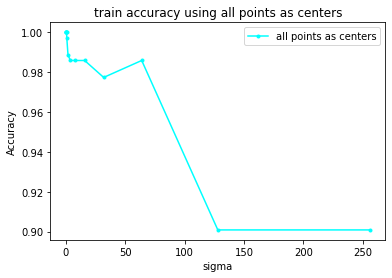

In [ ]:
plt.plot(sigmas,train_accuracy_list_full,marker='.', color = 'cyan',label="all centroid/point usage")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('train accuracy using all points as centers')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

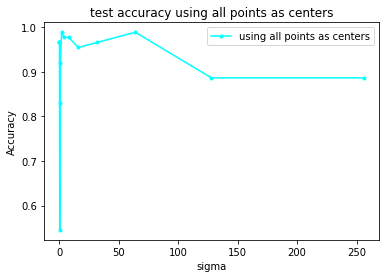

In [ ]:
plt.plot(sigmas,accuracy_list_full,marker='.', color = 'cyan',label="all centroid/point usage")
plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('test accuracy using all points as centers')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

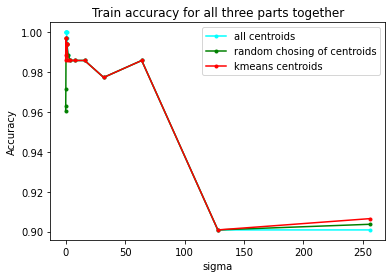

In [ ]:
#plot
plt.plot(sigmas,train_accuracy_list_full,marker='.',color = 'cyan',label="all centroids")
plt.plot(sigmas,train_accuracy_list_random,marker='.', color = 'green',label="random chosing of centroids")
plt.plot(sigmas,train_accuracy_list_kmeans,marker='.', color = 'red', label="kmeans centroids")

plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Train accuracy for all three parts together')
plt.legend()
plt.show

<function matplotlib.pyplot.show>

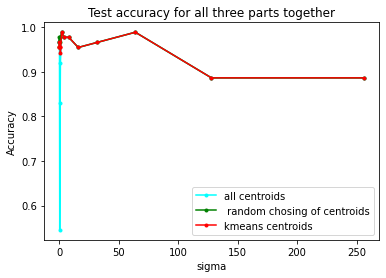

In [ ]:
#plot
plt.plot(sigmas,accuracy_list_full,marker='.', color = 'cyan',label="all centroids")
plt.plot(sigmas,accuracy_list_random,marker='.',color = 'green',label=" random chosing of centroids")
plt.plot(sigmas,accuracy_list_kmeans,marker='.', color = 'red',label="kmeans centroids ")

plt.xlabel('sigma')
plt.ylabel('Accuracy')
plt.title('Test accuracy for all three parts together')
plt.legend()
plt.show